This notebook follows the same form as Hysteresis_Analysis.ipynb, however with density and temperature compared alongside hysteresis.

In [13]:
import numpy as np
import RockSat_json.RockSat_json 
from fitting import RockSat_1_14_fitting_functions as R_fitting

import json
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True

In [ ]:
packets = RockSat_json.RockSat_json.import_data(f"C:/Users/carso/OneDrive/Documents/DAPPEr/Github/DAPPEr/Data/UDIP_4_800s.json")

In [ ]:
f_high_start = 8
f_high_stop = 51
f_low_start = 211
f_low_stop = 254
b = 300
# plt.scatter(packets['packets']['Full'][f'{b}']['Voltage'],
#             np.array(packets['packets']['Full'][f'{b}']['Current0']) * -1.e9, s=5)
# plt.scatter(packets['packets']['Full'][f'{b}']['Voltage'][f_high_start:f_high_stop],
#             np.array(packets['packets']['Full'][f'{b}']['Current0'][f_high_start:f_high_stop]) * -1.e9, marker = 'x')
# plt.scatter(packets['packets']['Full'][f'{b}']['Voltage'][f_low_start:f_low_stop],
#             np.array(packets['packets']['Full'][f'{b}']['Current0'][f_low_start:f_low_stop]) * -1.e9, marker='x')
# plt.xlabel(r"Volage [V]")
# plt.ylabel(r"Current [nA]")

In [ ]:
d_low_start = 8
d_low_stop = 70
d_high_start = 190
d_high_stop = 252
a = 36
# plt.scatter(packets['packets']['Dense'][f'{a}']['Voltage'],
#             np.array(packets['packets']['Dense'][f'{a}']['Current0']) * -1.e9, s=5)
# plt.scatter(packets['packets']['Dense'][f'{a}']['Voltage'][d_high_start:d_high_stop],
#             np.array(packets['packets']['Dense'][f'{a}']['Current0'][d_high_start:d_high_stop]) * -1.e9, marker = 'x')
# plt.scatter(packets['packets']['Dense'][f'{a}']['Voltage'][d_low_start:d_low_stop],
#             np.array(packets['packets']['Dense'][f'{a}']['Current0'][d_low_start:d_low_stop]) * -1.e9, marker = 'x')
# plt.xlabel(r"Volage [V]")
# plt.ylabel(r"Current [nA]")

Same process as before, now with fitting algorithm run. This is done on less sweeps as some of the "junk" sweeps cause issues in the fitting algorithm.

In [ ]:
full_times = []
dense_times = []
full_areas=[]
dense_areas = []
dense_nums = []
full_nums = []
full_rect = []
dense_rect = []
dense_hys= []
full_hys = []
full_densities = []
dense_densities = []
full_temps = []
dense_temps = []
for sweep in range(0,550):
    V = np.array(packets['packets']['Full'][f'{sweep}']['Voltage'])
    I = np.array(packets['packets']['Full'][f'{sweep}']['Current0']) * -1.e9 
    _,_,popt,_ = R_fitting.gen_fit(V[6:],I[6:])
    full_densities.append(popt[3])
    full_temps.append(popt[4])
    V_high = V[f_high_start:f_high_stop]
    V_high = V_high[::-1]
    V_low = V[f_low_start:f_low_stop]
    I_high = I[f_high_start:f_high_stop]
    I_high = I_high[::-1]
    I_low = I[f_low_start:f_low_stop]
    full_times.append(packets['packets']['Full'][f'{sweep}']['Start'] / 1000)
    full_nums.append(sweep)#for historesis vs sweep #
    sum = 0
    for i in range(1, len(V_high), 1):
        delta_V = np.abs(V_high[i] - V_high[i-1])
        sum += delta_V * np.abs(I_high[i] - I_low[i])
    full_areas.append(sum)
    full_rect.append(np.abs(V_low[0] - V_low[-1]) * np.percentile(I, 95))
    full_hys.append(sum / (np.abs(V_low[0] - V_low[-1]) * np.percentile(I, 95)))
     
for sweep in range(15,59):
    V = np.array(packets['packets']['Dense'][f'{sweep}']['Voltage'])
    I = np.array(packets['packets']['Dense'][f'{sweep}']['Current0']) * -1.e9
    _,_,popt,_ = R_fitting.gen_fit(V[6:],I[6:])
    dense_densities.append(popt[3])
    dense_temps.append(popt[4])
    dense_times.append(packets['packets']['Full'][f'{sweep}']['Start'] / 1000)
    dense_nums.append(sweep) #for historesis vs sweep #
    sum = 0
    V_high = V[d_high_start:d_high_stop]
    V_low = V[d_low_start:d_low_stop]
    V_low = V_low[::-1]
    I_high = I[d_high_start:d_high_stop]
    I_low = I[d_low_start:d_low_stop]
    I_low = I_low[::-1]
    for i in range(1, len(V_high), 1):
        delta_V = np.abs(V_high[i] - V_high[i-1])
        sum += delta_V * np.abs(I_high[i] - I_low[i])
    dense_areas.append(sum)
    dense_rect.append(np.abs(V_low[0] - V_low[-1]) * np.percentile(I, 95))
    dense_hys.append(sum / (np.abs(V_low[0] - V_low[-1]) * np.percentile(I, 95)))
    

NameError: name 'np' is not defined

In [ ]:
dense_nums = np.array(dense_nums)
full_nums = np.array(full_nums)
for i in range(0,550):
    full_nums[i] += i // 10
dense_nums *= 10

203.93002726154546


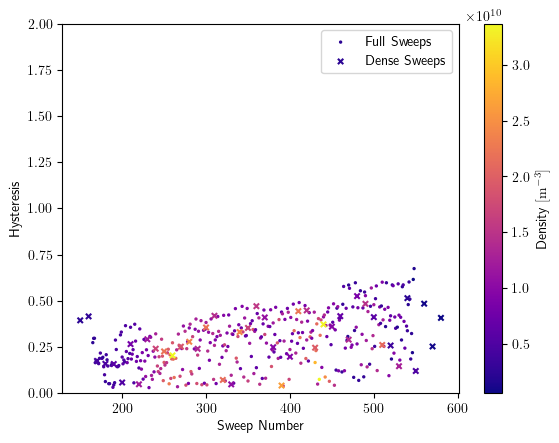

In [ ]:
plt.scatter(full_nums[150:500], full_hys[150:500],c=full_densities[150:500], cmap = "plasma", s =2)
plt.scatter(dense_nums, dense_hys, c = dense_densities, cmap = "plasma",s=15,  marker='x')
plt.legend([r"Full Sweeps", r"Dense Sweeps"])
plt.xlabel(r"Sweep Number")
plt.ylabel(r"Hysteresis ")
plt.ylim([0., 2.])
plt.colorbar(label=r"Density $\rm [m^{-3}]$")
print(dense_areas[0])
#plt.savefig("Hysteresis_Density.pdf")

203.93002726154546


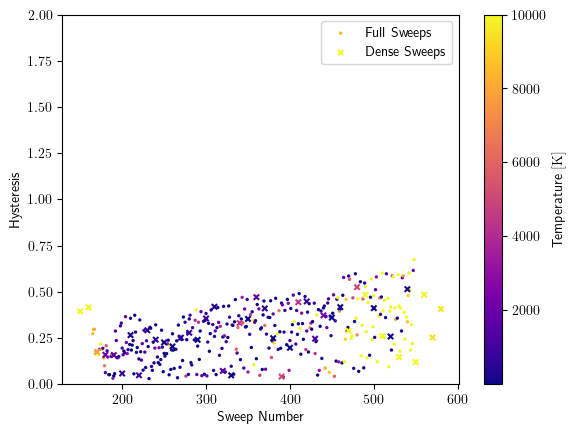

In [ ]:
plt.scatter(full_nums[150:500], full_hys[150:500],c=full_temps[150:500], cmap = "plasma", s =2)
plt.scatter(dense_nums, dense_hys, c = dense_temps, cmap = "plasma",s=15,  marker='x')
plt.legend([r"Full Sweeps", r"Dense Sweeps"])
plt.xlabel(r"Sweep Number")
plt.ylabel(r"Hysteresis")
plt.ylim([0., 2.])
plt.colorbar(label= r"Temperature $\rm [K]$")
print(dense_areas[0])


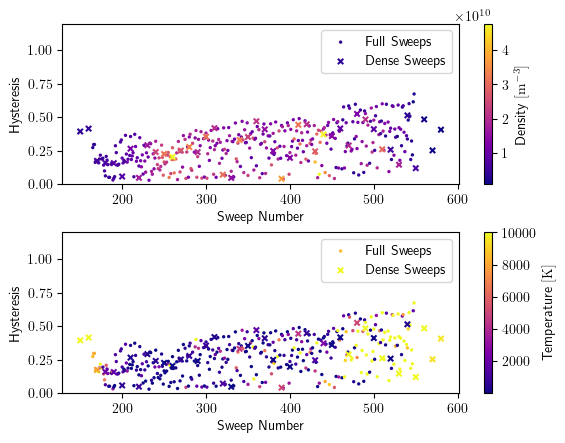

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)

sc1 = ax[0].scatter(full_nums[150:500], full_hys[150:500],c=full_densities[150:500], cmap = "plasma", s =2)
ax[0].scatter(dense_nums, dense_hys, c = dense_densities, cmap = "plasma",s=15,  marker='x')
ax[0].legend([r"Full Sweeps", r"Dense Sweeps"])
ax[0].set_xlabel(r"Sweep Number")
ax[0].set_ylabel(r"Hysteresis")
ax[0].set_ylim([0., 1.2])
fig.colorbar( sc1, ax = ax[0], label=r"Density $\rm [m^{-3}]$")
plt.subplots_adjust(hspace=0.3)
sc2 = ax[1].scatter(full_nums[150:500], full_hys[150:500],c=full_temps[150:500], cmap = "plasma", s =2)
ax[1].scatter(dense_nums, dense_hys, c = dense_temps, cmap = "plasma",s=15,  marker='x')
ax[1].legend([r"Full Sweeps", r"Dense Sweeps"])
ax[1].set_xlabel(r"Sweep Number")
ax[1].set_ylabel(r"Hysteresis ")
ax[1].set_ylim([0., 1.2])
fig.colorbar(sc2, ax = ax[1], label= r"Temperature $\rm [K]$")
plt.savefig("Hysteresis_Temp_Density.pdf")

Last cell was a backup to check weird IV curves, graphs each curve and the hysteresis analysis on that curve.

In [ ]:
# full_nums = []
# full_areas = []
# full_rect = []
# full_hys = []
# full_nums_adj = []
# for sweep in range(300,500):
#     V = np.array(packets['packets']['Full'][f'{sweep}']['Voltage'])
#     I = np.array(packets['packets']['Full'][f'{sweep}']['Current0']) * -1.e9
#     V_high = V[f_high_start:f_high_stop]
#     V_high = V_high[::-1]
#     V_low = V[f_low_start:f_low_stop]
#     I_high = I[f_high_start:f_high_stop]
#     I_high = I_high[::-1]
#     I_low = I[f_low_start:f_low_stop]
#     full_nums.append(sweep)#for historesis vs sweep #
#     full_nums_adj.append(sweep + (sweep // 10))
#     sum = 0
#     for i in range(1, len(V_high), 1):
#         delta_V = np.abs(V_high[i] - V_high[i-1])
#         sum += delta_V * np.abs(I_high[i] - I_low[i])
#     full_areas.append(sum)
#     rect = np.abs(V_low[0] - V_low[-1]) * np.percentile(I,95)
#     full_rect.append(rect)
#     full_hys.append(sum / rect)
#     plt.scatter(V, I, s = 5)
#     plt.scatter(V[f_high_start:f_high_stop],I[f_high_start:f_high_stop], marker = 'x')
#     plt.scatter(V[f_low_start:f_low_stop], I[f_low_start:f_low_stop], marker='x')
#     caption = r"Sweep num = " + str(sweep) + r"\\ Adjusted sweep num = " + str(sweep + (sweep // 10)) + r"\\ Hysteresis = " + str(sum/ rect) + r"\\ Area = " + str(sum)+ r"\\ Rect = " + str(rect) 
#     plt.text(-4,1000,caption)
#     plt.show()